 ### Optimizing Inventory Considering Shelf Life and Market Trends to Reduce Loss from Overproduction



In [5]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_squared_error,
                             mean_absolute_error,
                             mean_absolute_percentage_error)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


####Data Exploration and Preprocessing

In [6]:
from google.colab import files

In [7]:
uploaded = files.upload()

Saving Dataset.csv to Dataset.csv


In [8]:
df = pd.read_csv('Dataset.csv')

In [9]:
df.head()

,Product_ID,Shelf_Life_Days,Sales_2021,Sales_2022,Market_Trend_Factor,Compliance_Status,Supplier_ID,Manufacturing_Location,Product_Category,Safety_Stock_Days,Storage_Location
0,Product_1,277,602.6,545,0.906303,Compliant,Supplier_2,Location_B,Category_B,22,Warehouse_C
1,Product_2,343,359.4,345,0.972500,Compliant,Supplier_1,Location_C,Category_C,24,Warehouse_C
2,Product_3,291,983.0,915,1.026074,Non-compliant,Supplier_5,Location_C,Category_A,24,Warehouse_B
3,Product_4,298,789.4,751,0.911503,Compliant,Supplier_8,Location_C,Category_A,20,Warehouse_B
4,Product_5,260,326.8,430,1.052617,Compliant,Supplier_10,Location_A,Category_B,21,Warehouse_A


In [10]:
df.isnull().sum()

Product_ID                0
Shelf_Life_Days           0
Sales_2021                0
Sales_2022                0
Market_Trend_Factor       0
Compliance_Status         0
Supplier_ID               0
Manufacturing_Location    0
Product_Category          0
Safety_Stock_Days         0
Storage_Location          0
dtype: int64

In [11]:
df.duplicated().all()

False

In [12]:
df.describe()

,Shelf_Life_Days,Sales_2021,Sales_2022,Market_Trend_Factor,Safety_Stock_Days
count,19381.000000,19381.000000,19381.000000,19381.000000,19381.000000
mean,301.737939,618.423250,618.798256,0.999851,21.327073
std,25.576353,239.313199,220.590729,0.257548,7.090764
min,260.000000,80.000000,234.000000,0.078110,6.000000
25%,278.000000,429.000000,429.000000,0.823775,16.000000
50%,302.000000,619.200000,621.000000,1.000239,21.000000
75%,326.000000,811.200000,809.000000,1.175179,27.000000
max,344.000000,1155.400000,999.000000,1.909161,42.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19381 entries, 0 to 19380
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Product_ID              19381 non-null  object 
 1   Shelf_Life_Days         19381 non-null  int64  
 2   Sales_2021              19381 non-null  float64
 3   Sales_2022              19381 non-null  int64  
 4   Market_Trend_Factor     19381 non-null  float64
 5   Compliance_Status       19381 non-null  object 
 6   Supplier_ID             19381 non-null  object 
 7   Manufacturing_Location  19381 non-null  object 
 8   Product_Category        19381 non-null  object 
 9   Safety_Stock_Days       19381 non-null  int64  
 10  Storage_Location        19381 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.6+ MB


In [14]:
data = df.copy()

In [15]:
data.head()

,Product_ID,Shelf_Life_Days,Sales_2021,Sales_2022,Market_Trend_Factor,Compliance_Status,Supplier_ID,Manufacturing_Location,Product_Category,Safety_Stock_Days,Storage_Location
0,Product_1,277,602.6,545,0.906303,Compliant,Supplier_2,Location_B,Category_B,22,Warehouse_C
1,Product_2,343,359.4,345,0.972500,Compliant,Supplier_1,Location_C,Category_C,24,Warehouse_C
2,Product_3,291,983.0,915,1.026074,Non-compliant,Supplier_5,Location_C,Category_A,24,Warehouse_B
3,Product_4,298,789.4,751,0.911503,Compliant,Supplier_8,Location_C,Category_A,20,Warehouse_B
4,Product_5,260,326.8,430,1.052617,Compliant,Supplier_10,Location_A,Category_B,21,Warehouse_A


### Univariate Analysis

In [16]:
# Summary statistics for a specific categorical column
data['Shelf_Life_Days'].describe()


count    19381.000000
mean       301.737939
std         25.576353
min        260.000000
25%        278.000000
50%        302.000000
75%        326.000000
max        344.000000
Name: Shelf_Life_Days, dtype: float64

In [17]:
data['Compliance_Status'].unique()

array(['Compliant', 'Non-compliant'], dtype=object)

In [18]:
data['Product_Category'].unique()

array(['Category_B', 'Category_C', 'Category_A'], dtype=object)

In [19]:
data['Manufacturing_Location'].unique()

array(['Location_B', 'Location_C', 'Location_A'], dtype=object)

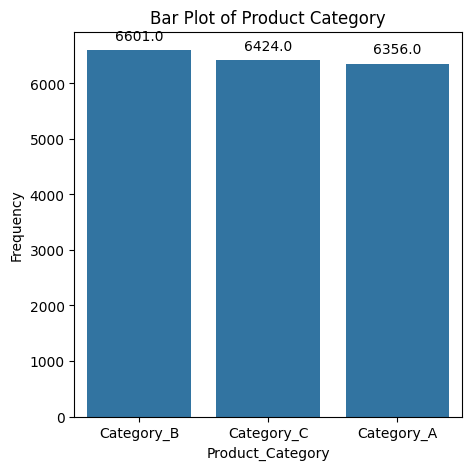

In [20]:
# Visualize categorical variables
plt.figure(figsize=(5, 5))
ax = sns.countplot(x='Product_Category', data=data)
plt.title('Bar Plot of Product Category')
plt.xlabel('Product_Category')
plt.ylabel('Frequency')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()


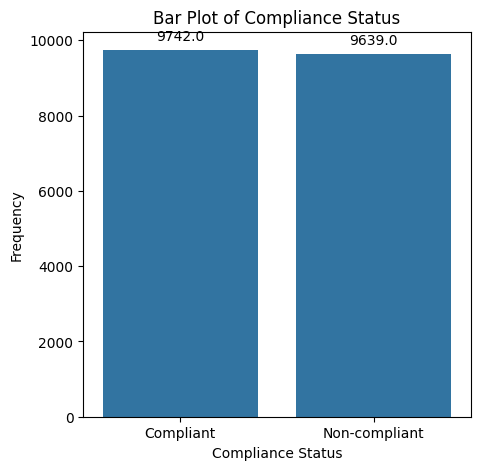

In [21]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x='Compliance_Status', data=data)
plt.title('Bar Plot of Compliance Status')
plt.xlabel('Compliance Status')
plt.ylabel('Frequency')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

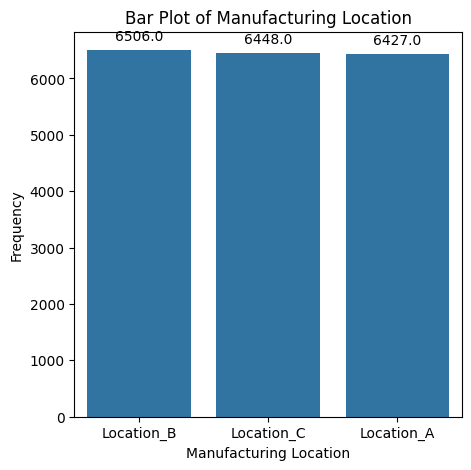

In [22]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x='Manufacturing_Location', data=data)
plt.title('Bar Plot of Manufacturing Location')
plt.xlabel('Manufacturing Location')
plt.ylabel('Frequency')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

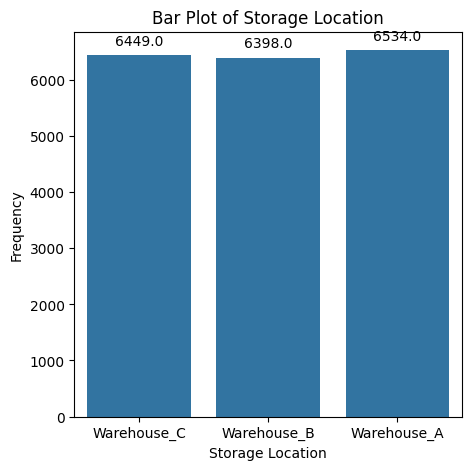

In [23]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x='Storage_Location', data=data)
plt.title('Bar Plot of Storage Location')
plt.xlabel('Storage Location')
plt.ylabel('Frequency')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

### Bivariate Analysis

### Sales Against Categorical Variables

Sales 2021 Against Categorical Variables

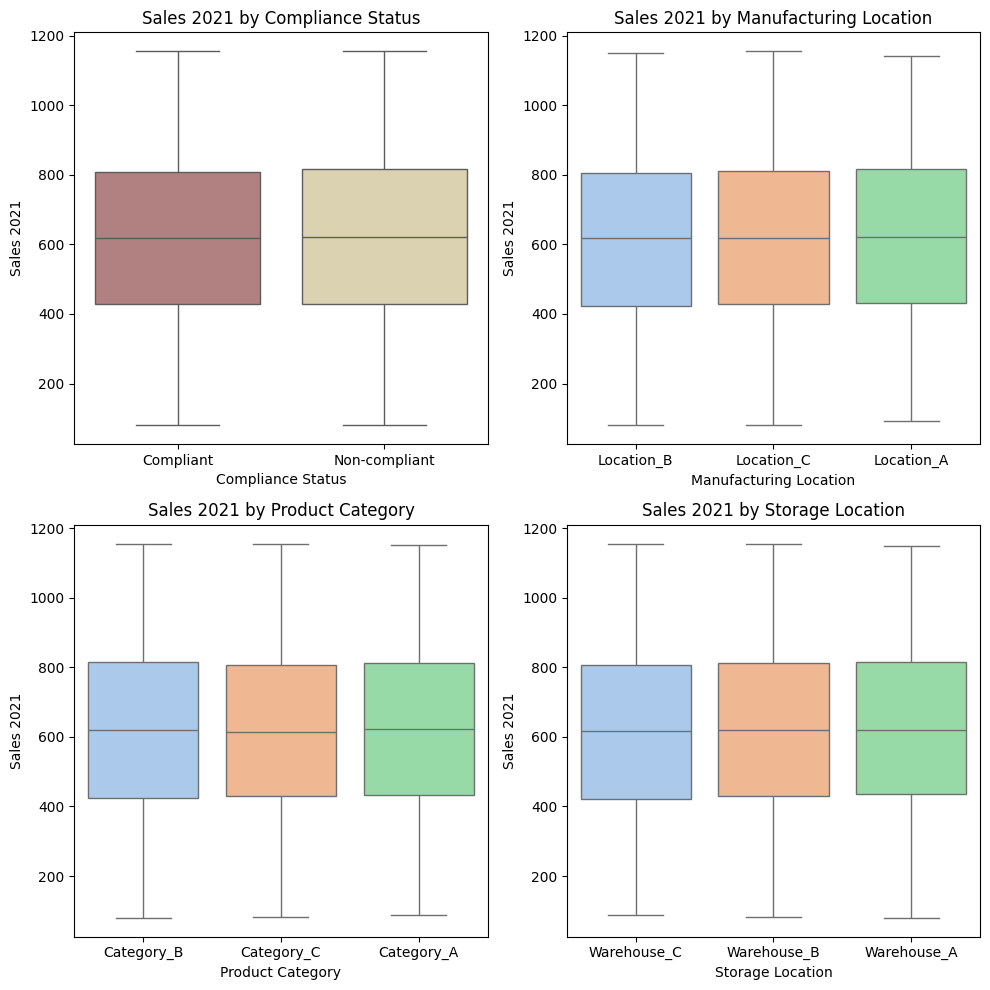

In [24]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

# Sales 2021 against Compliance Status
sns.boxplot(x='Compliance_Status', y='Sales_2021', data=data, ax=ax[0,0], palette='pink')
ax[0,0].set_title('Sales 2021 by Compliance Status')
ax[0,0].set_xlabel('Compliance Status')
ax[0,0].set_ylabel('Sales 2021')

# Sales 2021 against Manufacturing Location
sns.boxplot(x='Manufacturing_Location', y='Sales_2021', data=data, ax=ax[0,1], palette='pastel')
ax[0,1].set_title('Sales 2021 by Manufacturing Location')
ax[0,1].set_xlabel('Manufacturing Location')
ax[0,1].set_ylabel('Sales 2021')

# Sales 2021 by Product Category
sns.boxplot(x='Product_Category', y='Sales_2021', data=data, ax=ax[1,0], palette='pastel')
ax[1,0].set_title('Sales 2021 by Product Category')
ax[1,0].set_xlabel('Product Category')
ax[1,0].set_ylabel('Sales 2021')

# Sales 2021 by Storage Location
sns.boxplot(x='Storage_Location', y='Sales_2021', data=data, ax=ax[1,1], palette='pastel')
ax[1,1].set_title('Sales 2021 by Storage Location')
ax[1,1].set_xlabel('Storage Location')
ax[1,1].set_ylabel('Sales 2021')

plt.tight_layout()
plt.show()


Sales 2022 Against Categorical Variables

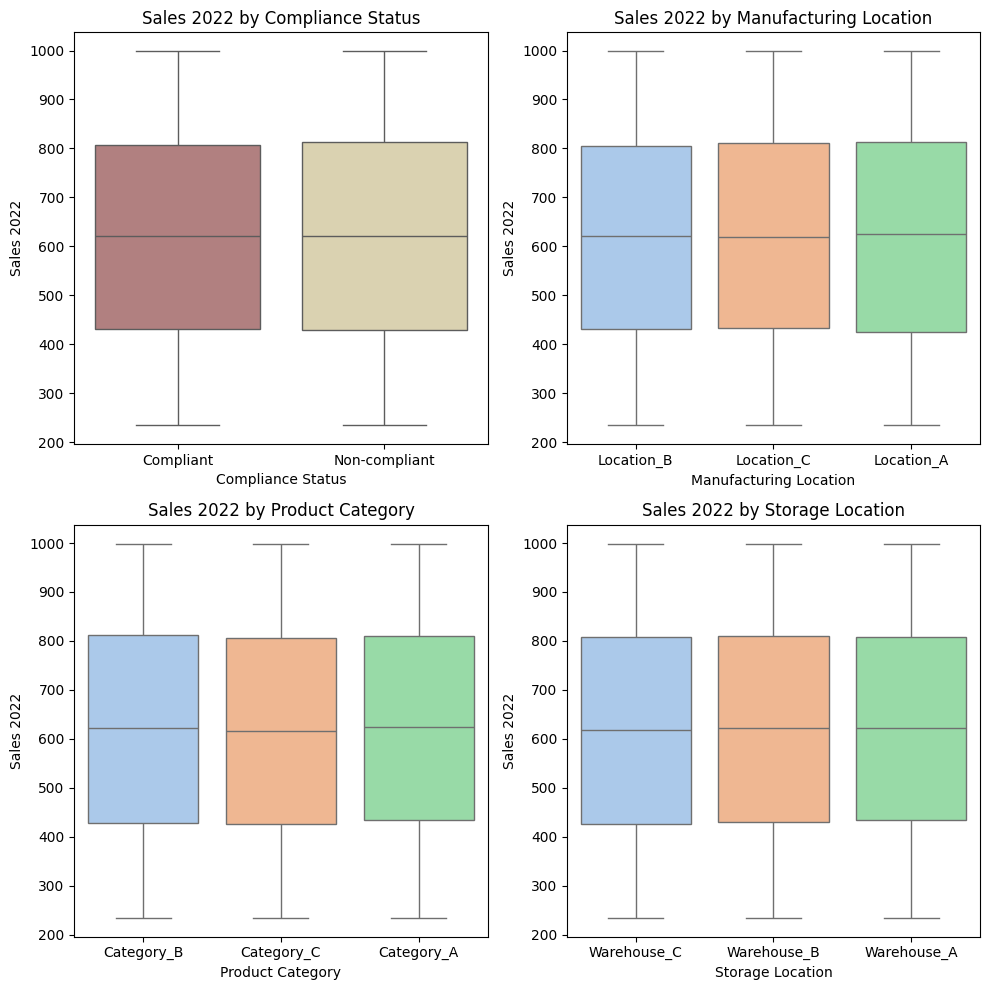

In [25]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

# Sales 2022 against Compliance Status
sns.boxplot(x='Compliance_Status', y='Sales_2022', data=data, ax=ax[0,0], palette='pink')
ax[0,0].set_title('Sales 2022 by Compliance Status')
ax[0,0].set_xlabel('Compliance Status')
ax[0,0].set_ylabel('Sales 2022')

# Sales 2022 against Manufacturing Location
sns.boxplot(x='Manufacturing_Location', y='Sales_2022', data=data, ax=ax[0,1], palette='pastel')
ax[0,1].set_title('Sales 2022 by Manufacturing Location')
ax[0,1].set_xlabel('Manufacturing Location')
ax[0,1].set_ylabel('Sales 2022')

# Sales 2022 by Product Category
sns.boxplot(x='Product_Category', y='Sales_2022', data=data, ax=ax[1,0], palette='pastel')
ax[1,0].set_title('Sales 2022 by Product Category')
ax[1,0].set_xlabel('Product Category')
ax[1,0].set_ylabel('Sales 2022')

# Sales 2022 by Storage Location
sns.boxplot(x='Storage_Location', y='Sales_2022', data=data, ax=ax[1,1], palette='pastel')
ax[1,1].set_title('Sales 2022 by Storage Location')
ax[1,1].set_xlabel('Storage Location')
ax[1,1].set_ylabel('Sales 2022')

plt.tight_layout()
plt.show()

### Sales Against Numerical Variables

Sales Against 'Shelf_Life_Days' and 'Market_Trend_Factors'

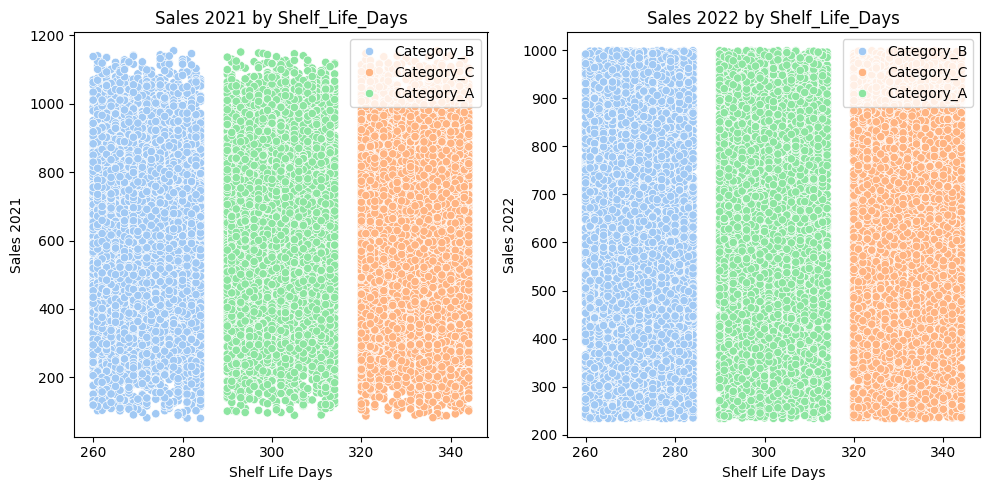

In [26]:
# Sales Against Shelf_Life_Days

fig, ax = plt.subplots(1,2, figsize=(10,5))

# Shelf_Life_Days against Sales 2021

sns.scatterplot(x='Shelf_Life_Days', y='Sales_2021', data=data, ax=ax[0], palette='pastel', hue='Product_Category')
ax[0].set_title('Sales 2021 by Shelf_Life_Days')
ax[0].set_xlabel('Shelf Life Days')
ax[0].set_ylabel('Sales 2021')
ax[0].legend(loc='upper right')

# Shelf Life Days against Sales 2022

sns.scatterplot(x='Shelf_Life_Days', y='Sales_2022', data=data, ax=ax[1], palette='pastel', hue='Product_Category')
ax[1].set_title('Sales 2022 by Shelf_Life_Days')
ax[1].set_xlabel('Shelf Life Days')
ax[1].set_ylabel('Sales 2022')
ax[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

Sales Against Market Trend Factors

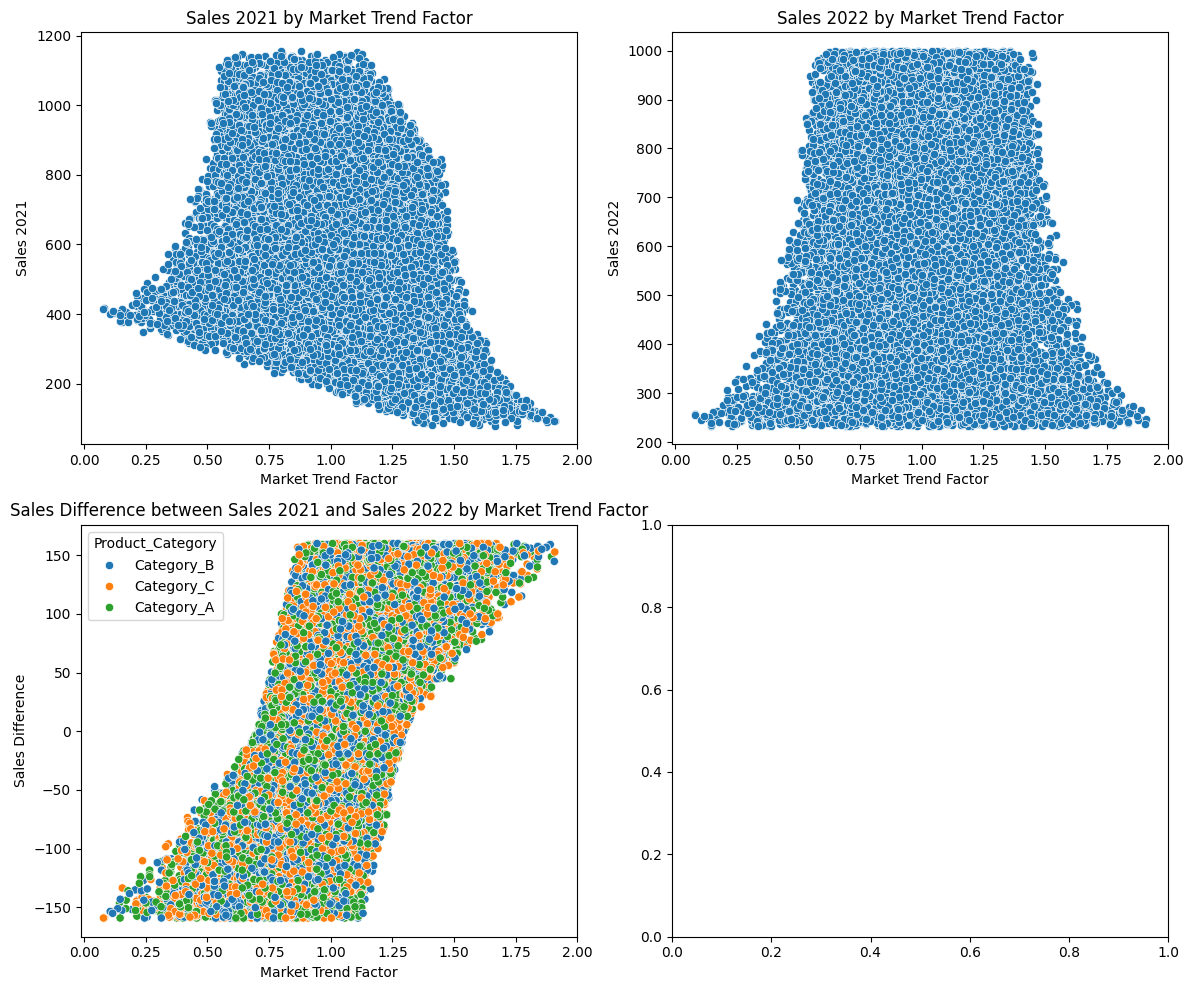

In [27]:
fig, ax = plt.subplots(2,2, figsize=(12,10))

# Market Trend Factor Against Sales 2021
sns.scatterplot(x='Market_Trend_Factor', y='Sales_2021', data=data, ax=ax[0,0], markers='x')
ax[0,0].set_title('Sales 2021 by Market Trend Factor')
ax[0,0].set_xlabel('Market Trend Factor')
ax[0,0].set_ylabel('Sales 2021')

# Market Trend Factor Against Sales 2022
sns.scatterplot(x='Market_Trend_Factor', y='Sales_2022', data=data, ax=ax[0,1], markers='x')
ax[0,1].set_title('Sales 2022 by Market Trend Factor')
ax[0,1].set_xlabel('Market Trend Factor')
ax[0,1].set_ylabel('Sales 2022')

# Market Trend Factor Against Difference between Sales 2021 and Sales 2022

# Calculate the difference
data['Sales_Difference'] = data['Sales_2022'] - data['Sales_2021']
sns.scatterplot(x='Market_Trend_Factor', y='Sales_Difference', data=data, ax=ax[1,0], hue='Product_Category')
ax[1,0].set_title('Sales Difference between Sales 2021 and Sales 2022 by Market Trend Factor')
ax[1,0].set_xlabel('Market Trend Factor')
ax[1,0].set_ylabel('Sales Difference')

data.drop('Sales_Difference', axis=1, inplace=True)

plt.tight_layout()
plt.show()


###Sales 2021 Against sales 2022

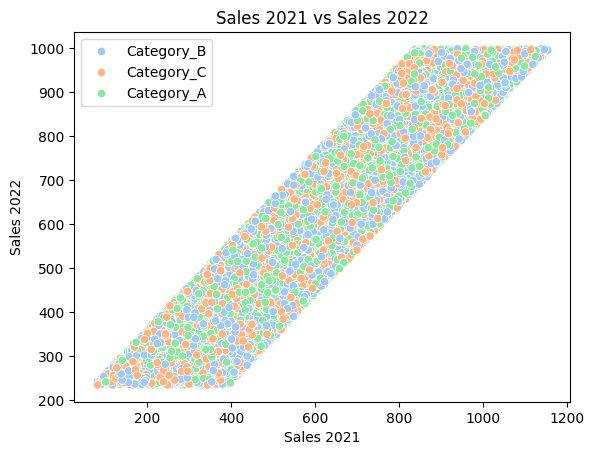

In [28]:
# Sales 2021 vs Sales 2022
sns.scatterplot(x='Sales_2021', y='Sales_2022', data=data, hue='Product_Category', palette='pastel')
plt.title('Sales 2021 vs Sales 2022')
plt.xlabel('Sales 2021')
plt.ylabel('Sales 2022')
plt.legend(loc='upper left')
plt.show()

In [29]:
data.head()

,Product_ID,Shelf_Life_Days,Sales_2021,Sales_2022,Market_Trend_Factor,Compliance_Status,Supplier_ID,Manufacturing_Location,Product_Category,Safety_Stock_Days,Storage_Location
0,Product_1,277,602.6,545,0.906303,Compliant,Supplier_2,Location_B,Category_B,22,Warehouse_C
1,Product_2,343,359.4,345,0.972500,Compliant,Supplier_1,Location_C,Category_C,24,Warehouse_C
2,Product_3,291,983.0,915,1.026074,Non-compliant,Supplier_5,Location_C,Category_A,24,Warehouse_B
3,Product_4,298,789.4,751,0.911503,Compliant,Supplier_8,Location_C,Category_A,20,Warehouse_B
4,Product_5,260,326.8,430,1.052617,Compliant,Supplier_10,Location_A,Category_B,21,Warehouse_A


Product Category against Market Trend Factor, Shelf Life Days and Safety Stock Days


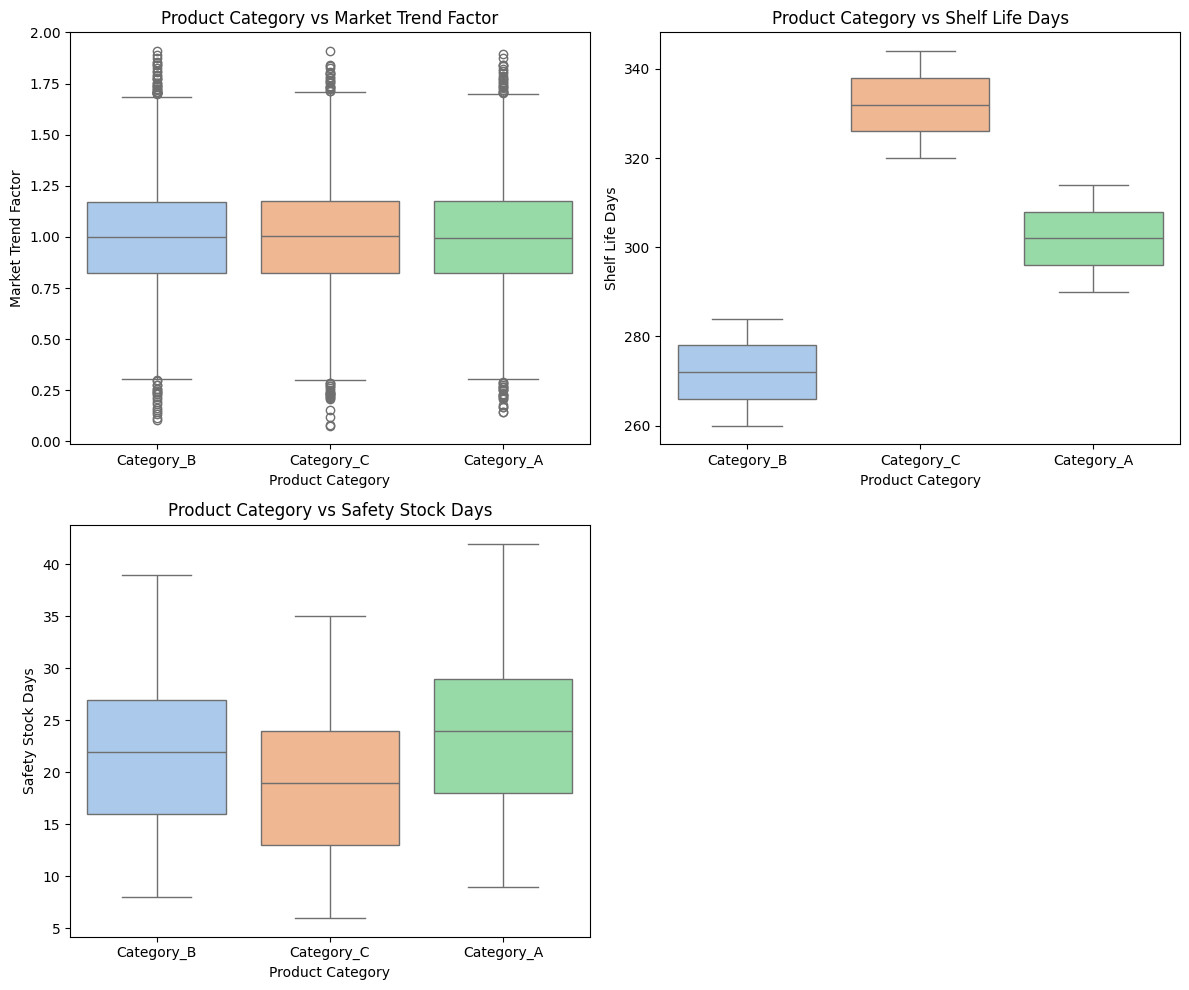

In [30]:
# Product Category against Market Trend Factor, Shelf Life Days and Safety Stock Days

fig, ax = plt.subplots(2,2, figsize=(12,10))

# Product Category vs Market Trend Factor
sns.boxplot(x='Product_Category', y='Market_Trend_Factor', data=data, ax=ax[0,0], palette='pastel')
ax[0,0].set_title('Product Category vs Market Trend Factor')
ax[0,0].set_xlabel('Product Category')
ax[0,0].set_ylabel('Market Trend Factor')

# Product Category vs Shelf Life Days
sns.boxplot(x='Product_Category', y='Shelf_Life_Days', data=data, ax=ax[0,1], palette='pastel')
ax[0,1].set_title('Product Category vs Shelf Life Days')
ax[0,1].set_xlabel('Product Category')
ax[0,1].set_ylabel('Shelf Life Days')

# Product Category vs Safety stock Days
sns.boxplot(x='Product_Category', y='Safety_Stock_Days', data=data, ax=ax[1,0], palette='pastel')
ax[1,0].set_title('Product Category vs Safety Stock Days')
ax[1,0].set_xlabel('Product Category')
ax[1,0].set_ylabel('Safety Stock Days')

ax[1,1].remove()

plt.tight_layout()
plt.show()

## Demand Forecasting and Inventory Optimization


*   Using 'Market_Trend_Factor' and 'Sales_2022' to estimate Sales in 2023
*   Using 'Sales_2021' and 'Sales_2022' to estimate Sales in 2023



Using Market Trend Factor and Sales 2022 to estimate Sales 2023

In [31]:
# Making estimates for 2023 using 'Market_Trend_Factor' and 'Sales_2022'

df_mtf = data.copy()
df_mtf.head()

,Product_ID,Shelf_Life_Days,Sales_2021,Sales_2022,Market_Trend_Factor,Compliance_Status,Supplier_ID,Manufacturing_Location,Product_Category,Safety_Stock_Days,Storage_Location
0,Product_1,277,602.6,545,0.906303,Compliant,Supplier_2,Location_B,Category_B,22,Warehouse_C
1,Product_2,343,359.4,345,0.972500,Compliant,Supplier_1,Location_C,Category_C,24,Warehouse_C
2,Product_3,291,983.0,915,1.026074,Non-compliant,Supplier_5,Location_C,Category_A,24,Warehouse_B
3,Product_4,298,789.4,751,0.911503,Compliant,Supplier_8,Location_C,Category_A,20,Warehouse_B
4,Product_5,260,326.8,430,1.052617,Compliant,Supplier_10,Location_A,Category_B,21,Warehouse_A


Feature Engineering

In [32]:
df_mtf['Projected_Sales_2023'] = df_mtf['Sales_2022'] * df_mtf['Market_Trend_Factor']

df_mtf['Projected_Sales_2023'] = df_mtf['Projected_Sales_2023'].apply(lambda x: x if x >= 0 else 0)


In [33]:
# Encoding Categorical Variables

cols = ['Product_Category', 'Manufacturing_Location', 'Storage_Location', 'Compliance_Status', 'Supplier_ID', ]

label_encoder = {}

le = LabelEncoder()
for column in cols:
    df_mtf[column] = le.fit_transform(df_mtf[column])
    label_encoder[column] = le

In [34]:
df_mtf.head()

,Product_ID,Shelf_Life_Days,Sales_2021,Sales_2022,Market_Trend_Factor,Compliance_Status,Supplier_ID,Manufacturing_Location,Product_Category,Safety_Stock_Days,Storage_Location,Projected_Sales_2023
0,Product_1,277,602.6,545,0.906303,0,2,1,1,22,2,493.935278
1,Product_2,343,359.4,345,0.972500,0,0,2,2,24,2,335.512507
2,Product_3,291,983.0,915,1.026074,1,5,2,0,24,1,938.857721
3,Product_4,298,789.4,751,0.911503,0,8,2,0,20,1,684.538694
4,Product_5,260,326.8,430,1.052617,0,1,0,1,21,0,452.625369


In [35]:
# Prepare X and y data

X = df_mtf.drop(['Product_ID', 'Projected_Sales_2023'], axis=1)
y = df_mtf['Projected_Sales_2023']


In [36]:
# Split into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
# Demand Forecasting

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Mean Absolute Percentage Error:', mape)


Mean Absolute Error: 6.185636442490192
Mean Squared Error: 71.23074869315798
Mean Absolute Percentage Error: 1.1860967227357138


Inventory Optimization

In [38]:
# Get Average Daily Sales

df_mtf['Average_Daily_Sales'] = (df_mtf['Sales_2021'] + df_mtf['Sales_2022']) / (2 * 365)

In [39]:
# Get Safety Stock

df_mtf['Safety_Stock'] = df_mtf['Safety_Stock_Days'] * df_mtf['Average_Daily_Sales']

In [40]:
# Get Optimal Inventory for 2023

df_mtf['Optimal_Inventory'] = df_mtf['Projected_Sales_2023'] + df_mtf['Safety_Stock']


In [41]:
df_mtf.rename(columns={'Optimal_Inventory': 'Optimal_Inventory_2023'}, inplace=True)
df_mtf.head()

,Product_ID,Shelf_Life_Days,Sales_2021,Sales_2022,Market_Trend_Factor,Compliance_Status,Supplier_ID,Manufacturing_Location,Product_Category,Safety_Stock_Days,Storage_Location,Projected_Sales_2023,Average_Daily_Sales,Safety_Stock,Optimal_Inventory_2023
0,Product_1,277,602.6,545,0.906303,0,2,1,1,22,2,493.935278,1.572055,34.585205,528.520483
1,Product_2,343,359.4,345,0.972500,0,0,2,2,24,2,335.512507,0.964932,23.158356,358.670864
2,Product_3,291,983.0,915,1.026074,1,5,2,0,24,1,938.857721,2.600000,62.400000,1001.257721
3,Product_4,298,789.4,751,0.911503,0,8,2,0,20,1,684.538694,2.110137,42.202740,726.741433
4,Product_5,260,326.8,430,1.052617,0,1,0,1,21,0,452.625369,1.036712,21.770959,474.396328


In [42]:
# Factor Shelf Life in estimation

df_mtf['Optimal_Inventory_2023'] = df_mtf.apply(lambda row: min(row['Optimal_Inventory_2023'],
                                                                row['Shelf_Life_Days'] * row['Average_Daily_Sales']), axis=1)


In [43]:
df_mtf.head()

,Product_ID,Shelf_Life_Days,Sales_2021,Sales_2022,Market_Trend_Factor,Compliance_Status,Supplier_ID,Manufacturing_Location,Product_Category,Safety_Stock_Days,Storage_Location,Projected_Sales_2023,Average_Daily_Sales,Safety_Stock,Optimal_Inventory_2023
0,Product_1,277,602.6,545,0.906303,0,2,1,1,22,2,493.935278,1.572055,34.585205,435.459178
1,Product_2,343,359.4,345,0.972500,0,0,2,2,24,2,335.512507,0.964932,23.158356,330.971507
2,Product_3,291,983.0,915,1.026074,1,5,2,0,24,1,938.857721,2.600000,62.400000,756.600000
3,Product_4,298,789.4,751,0.911503,0,8,2,0,20,1,684.538694,2.110137,42.202740,628.820822
4,Product_5,260,326.8,430,1.052617,0,1,0,1,21,0,452.625369,1.036712,21.770959,269.545205


###Using 'Sales_2021' and 'Sales_2022' to estimate Sales in 2023

Feature Engineering

Generally, the formula is: y = mx + c
  where c is y_0 which is the intercept represented by the baseline line
  x is x - x_0 which represents the number of years from the baseline year
  m is the slope which is the change in slope per year
x = year
y = Sales

Slope = (Sales_2022 - Sales_2021) / (2022 - 2021)

Since  2022 - 2021 is 1, we can then write our slope as Sales_2022 - Sales_2021

Projected_Sales_2023 = Sales_2021 + Slope * (2023-2021)

Also, 2023 - 2021 is 2 therefore, the equation can be written thus:
Projected_Sales_2023 = Sales_2021 + Slope * 2



In [45]:
df_lp = data.copy()

In [46]:
slope = df_lp['Sales_2022'] - df_lp['Sales_2021']

df_lp['Projected_Sales_2023'] = df_lp['Sales_2021'] + (2 * slope)

df_lp['Projected_Sales_2023'] = df_lp['Projected_Sales_2023'].apply(lambda x: x if x >= 0 else 0)


In [47]:
# Encoding Categorical Variables

cols = ['Product_Category', 'Manufacturing_Location', 'Storage_Location', 'Compliance_Status', 'Supplier_ID',]

label_encoder = {}

le = LabelEncoder()
for column in cols:
    df_lp[column] = le.fit_transform(df_lp[column])
    label_encoder[column] = le

In [48]:
df_lp.head()

,Product_ID,Shelf_Life_Days,Sales_2021,Sales_2022,Market_Trend_Factor,Compliance_Status,Supplier_ID,Manufacturing_Location,Product_Category,Safety_Stock_Days,Storage_Location,Projected_Sales_2023
0,Product_1,277,602.6,545,0.906303,0,2,1,1,22,2,487.4
1,Product_2,343,359.4,345,0.972500,0,0,2,2,24,2,330.6
2,Product_3,291,983.0,915,1.026074,1,5,2,0,24,1,847.0
3,Product_4,298,789.4,751,0.911503,0,8,2,0,20,1,712.6
4,Product_5,260,326.8,430,1.052617,0,1,0,1,21,0,533.2


In [49]:
# Prepare X and y data

X = df_lp.drop(['Product_ID', 'Projected_Sales_2023'], axis=1)
y = df_lp['Projected_Sales_2023']


In [50]:
# Split into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
# Demand Forecasting

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)


Mean Absolute Error: 7.262596732588135
Mean Squared Error: 9.646478915128421
Mean Absolute Percentage Error: 1.5011007900415516


Inventory Optimization

In [52]:
#Get Average Daily Sales

df_lp['Average_Daily_Sales'] = (df_lp['Sales_2021'] + df_lp['Sales_2022']) / (2 * 365)

In [53]:
# Get Safety Stock

df_lp['Safety_Stock'] = df_lp['Safety_Stock_Days'] * df_lp['Average_Daily_Sales']

In [54]:
# Get Optimal Inventory for 2023

df_lp['Optimal_Inventory_2023'] = df_lp['Projected_Sales_2023'] + df_lp['Safety_Stock']


In [55]:
# Factor Shelf Life in estimation

df_lp['Optimal_Inventory_2023'] = df_lp.apply(lambda row: min(row['Optimal_Inventory_2023'],
                                                                row['Shelf_Life_Days'] * row['Average_Daily_Sales']), axis=1)


##Conclusion

Results from Market Trend Factor and Sales 2022

In [59]:
df_mtf[['Product_ID', 'Projected_Sales_2023', 'Safety_Stock', 'Optimal_Inventory_2023']].head()

,Product_ID,Projected_Sales_2023,Safety_Stock,Optimal_Inventory_2023
0,Product_1,493.935278,34.585205,435.459178
1,Product_2,335.512507,23.158356,330.971507
2,Product_3,938.857721,62.400000,756.600000
3,Product_4,684.538694,42.202740,628.820822
4,Product_5,452.625369,21.770959,269.545205


Results from Sales 2021 and Sales 2022

In [60]:
df_lp[['Product_ID', 'Projected_Sales_2023', 'Safety_Stock', 'Optimal_Inventory_2023']].head()

,Product_ID,Projected_Sales_2023,Safety_Stock,Optimal_Inventory_2023
0,Product_1,487.4,34.585205,435.459178
1,Product_2,330.6,23.158356,330.971507
2,Product_3,847.0,62.400000,756.600000
3,Product_4,712.6,42.202740,628.820822
4,Product_5,533.2,21.770959,269.545205


In [62]:
columns = ['Projected_Sales_2023', 'Optimal_Inventory_2023']

errors = dict()

for cols in columns:
  mtf, lp = df_mtf[cols], df_lp[cols]

  mae = mean_absolute_error(mtf, lp)
  mse = mean_squared_error(mtf, lp)
  rmse = mean_squared_error(mtf, lp, squared=False)
  mape = mean_absolute_percentage_error(mtf, lp) * 100

  errors[cols] = [mae, mse, rmse, mape]

pd.DataFrame(errors, index=['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Percentage Error'])



,Projected_Sales_2023,Optimal_Inventory_2023
Mean Absolute Error,92.516408,17.137992
Mean Squared Error,12873.965456,1734.213358
Root Mean Squared Error,113.463498,41.643887
Mean Absolute Percentage Error,16.661423,4.719451
